Energy_Census

In [48]:
%matplotlib notebook

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import matplotlib.style as style 
# style.available

In [50]:
plt.style.use('fast')

In [51]:
Data = pd.read_csv("Energy Census and Economic Data US 2010-2014.csv")
Data.count()

StateCodes               52
State                    52
Region                   51
Division                 51
Coast                    51
Great Lakes              51
TotalC2010               52
TotalC2011               52
TotalC2012               52
TotalC2013               52
TotalC2014               52
TotalP2010               52
TotalP2011               52
TotalP2012               52
TotalP2013               52
TotalP2014               52
TotalE2010               52
TotalE2011               52
TotalE2012               52
TotalE2013               52
TotalE2014               52
TotalPrice2010           52
TotalPrice2011           52
TotalPrice2012           52
TotalPrice2013           52
TotalPrice2014           52
TotalC10-11              52
TotalC11-12              52
TotalC12-13              52
TotalC13-14              52
                         ..
CENSUS2010POP            52
POPESTIMATE2010          52
POPESTIMATE2011          52
POPESTIMATE2012          52
POPESTIMATE2013     

In [56]:
Data_Reduced = Data[["State", "StateCodes", "Region", "Division", "Coast", "Great Lakes", 
                     "TotalC2010", "TotalC2011", "TotalC2012", "TotalC2013", "TotalC2014", 
                     "TotalP2010", "TotalP2011", "TotalP2012", "TotalP2013", "TotalP2014",
                     "TotalE2010", "TotalE2011", "TotalE2012", "TotalE2013", "TotalE2014",
                     "TotalPrice2010", "TotalPrice2011", "TotalPrice2012", "TotalPrice2013", "TotalPrice2014",
                     "POPESTIMATE2010", "POPESTIMATE2011", "POPESTIMATE2012", "POPESTIMATE2013", "POPESTIMATE2014"]]
Data_Reduced = Data_Reduced[Data_Reduced.State != "United States"] 
Data_Reduced = Data_Reduced[Data_Reduced.State != "District of Columbia"]
Data_Reduced = Data_Reduced.sort_values(by=['TotalC2010'], ascending=False)
Data_Reduced.head()

,State,StateCodes,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,TotalPrice2010,TotalPrice2011,TotalPrice2012,TotalPrice2013,TotalPrice2014,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
42,Texas,TX,3.0,7.0,1.0,0.0,11687521,11906249,11931169,12660976,...,17.36,20.55,19.10,19.08,19.05,25245717,25657477,26094422,26505637,26956958
4,California,CA,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,20.97,24.35,24.97,24.85,25.31,37336011,37701901,38062780,38431393,38802500
17,Louisiana,LA,3.0,7.0,1.0,0.0,4385758,4388867,4255161,4196622,...,15.06,17.96,15.46,15.67,15.49,4545581,4575972,4604744,4629284,4649676
8,Florida,FL,3.0,5.0,1.0,0.0,4282673,4141711,4029903,4076406,...,22.05,25.41,25.56,25.13,24.91,18852220,19107900,19355257,19600311,19893297
12,Illinois,IL,2.0,3.0,0.0,1.0,3955091,3937616,3820547,3991089,...,17.39,19.53,19.35,18.54,19.02,12840097,12858725,12873763,12890552,12880580


In [57]:
years = ["2010", "2011", "2012", "2013", "2014"]
years

['2010', '2011', '2012', '2013', '2014']

In [58]:
c = ['green', 'blue', 'red', 'orange']
c

['green', 'blue', 'red', 'orange']

<IPython.core.display.Javascript object>


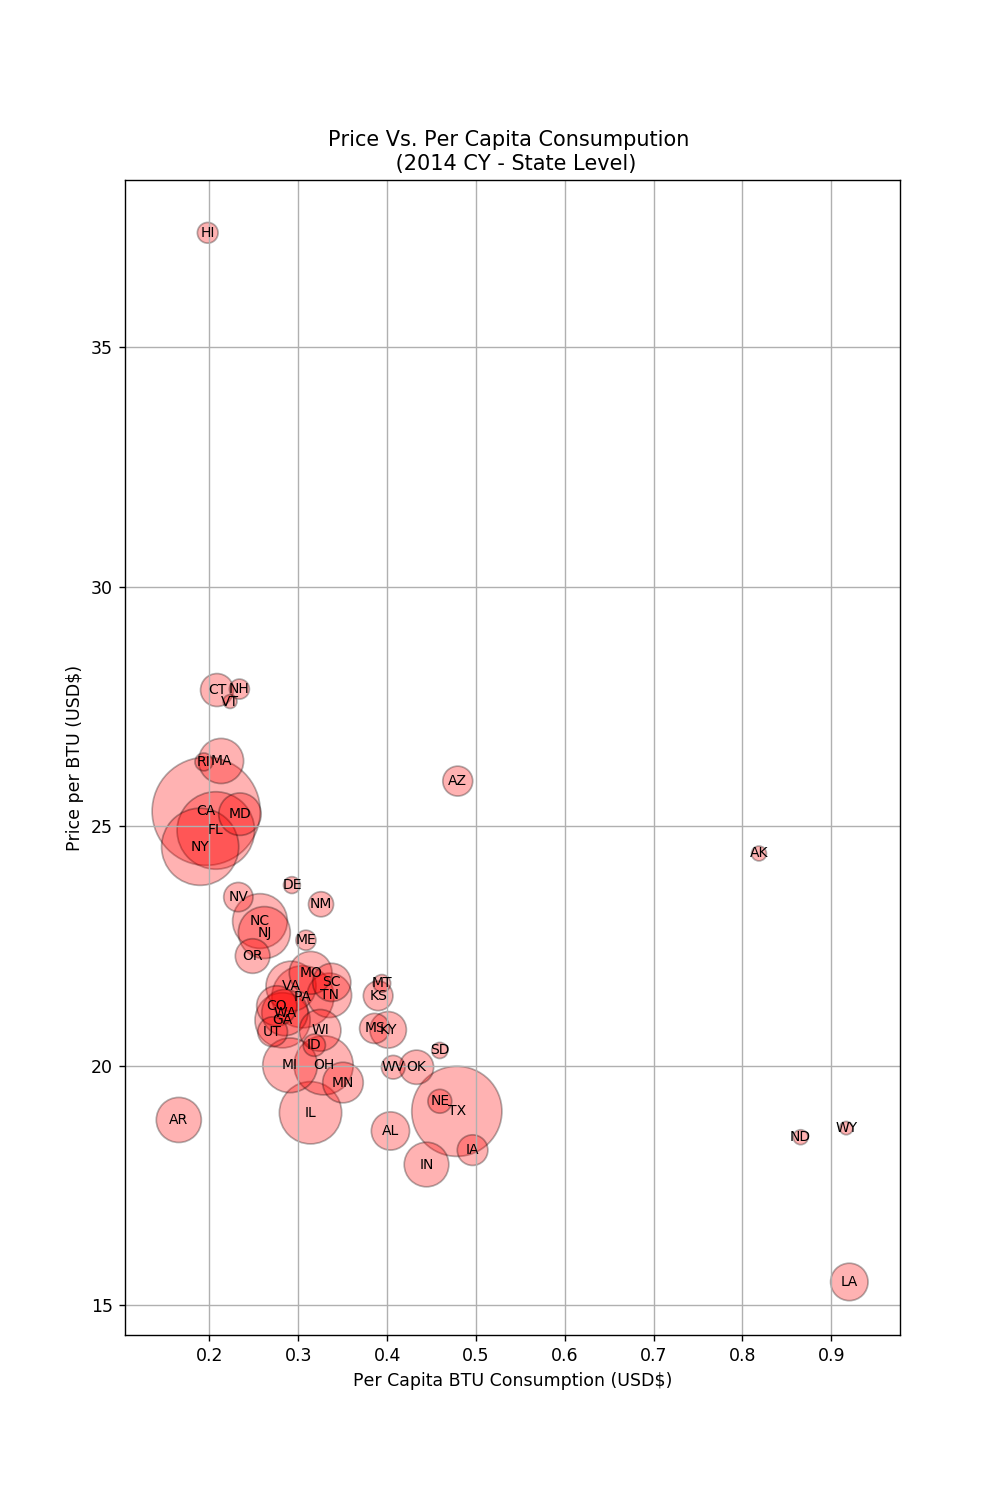

In [65]:
# Loop through each year creating plots 
#for year in years:

    
BTUCap = Data_Reduced["TotalC2014"]/Data_Reduced["POPESTIMATE2014"]
Price = Data_Reduced["TotalPrice2014"]
Pop = Data_Reduced["POPESTIMATE2014"]
States = Data_Reduced["StateCodes"]



plt.figure(figsize=(8,12))
    
plt.scatter(BTUCap, Price, s=Pop/10000, c="red", marker="o", edgecolor="black", linewidths=1,
              alpha=0.3, label="Price")

for i in range(len(States)):
    plt.annotate(States[i], xy=(BTUCap[i], Price[i]), fontsize=8, 
                 horizontalalignment='center', verticalalignment='center')   

# Diplay results
plt.tight_layout
plt.title("Price Vs. Per Capita Consumpution \n (2014 CY - State Level)")
plt.ylabel("Price per BTU (USD$)")
plt.xlabel("Per Capita BTU Consumption (USD$)")
plt.grid()
plt.show()

SaveFile=("Output/temp2014_State")
plt.savefig(SaveFile)

In [187]:
# Tip
# Helpful ways to get current figure and current axis from most recent plot
# plt.gcf()
# plt.gca()